In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
train = pd.read_csv(os.getcwd()+'/train.csv')
test = pd.read_csv(os.getcwd()+'/test.csv')
submission = pd.read_csv(os.getcwd()+'/submission.csv')

In [17]:
train.shape, test.shape

((544, 16), (29, 16))

In [4]:
train

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11/05/19,152.57,165.65,134.76,146.06,149.81,134.17,122.98,115.81,98.29,81.65,109.36,94.33,89.81,70.66,118.993571
540,18/05/19,147.74,159.89,134.5,146.36,148.81,142.88,122.98,113,96.47,78.46,111.36,90.39,90.96,66.68,117.891429
541,25/05/19,149.69,155.28,134.29,142.67,147.25,149.11,122.78,111.2,94.61,77.33,109.2,92.87,87.72,66.49,117.177857
542,01/06/19,144.51,150.81,138.45,151.35,149.7,151.4,122.82,111.12,93.01,77.14,109.69,91.66,86.6,68,117.590000


In [18]:
train['WeekEnding_Date'] = pd.to_datetime(train['WeekEnding_Date'], dayfirst = True )

In [19]:
train['WeekEnding_Date']

0     2009-01-03
1     2009-01-10
2     2009-01-17
3     2009-01-24
4     2009-01-31
         ...    
539   2019-05-11
540   2019-05-18
541   2019-05-25
542   2019-06-01
543   2019-06-08
Name: WeekEnding_Date, Length: 544, dtype: datetime64[ns]

In [6]:
train['WeekEnding_Date'].shift(1)

0            NaT
1     2009-03-01
2     2009-10-01
3     2009-01-17
4     2009-01-24
         ...    
539   2019-04-05
540   2019-11-05
541   2019-05-18
542   2019-05-25
543   2019-01-06
Name: WeekEnding_Date, Length: 544, dtype: datetime64[ns]

In [8]:
train['WeekEnding_Date'] - train['WeekEnding_Date'].shift(1)

0           NaT
1      214 days
2     -257 days
3        7 days
4        7 days
         ...   
539    214 days
540   -171 days
541      7 days
542   -139 days
543    212 days
Name: WeekEnding_Date, Length: 544, dtype: timedelta64[ns]

In [20]:
train_indexed = train[['WeekEnding_Date', 'Average']]

In [21]:
train_indexed

,WeekEnding_Date,Average
0,2009-01-03,69.700000
1,2009-01-10,70.550000
2,2009-01-17,69.830000
3,2009-01-24,67.846667
4,2009-01-31,67.196923
...,...,...
539,2019-05-11,118.993571
540,2019-05-18,117.891429
541,2019-05-25,117.177857
542,2019-06-01,117.590000


In [22]:
train_indexed = train_indexed.set_index(['WeekEnding_Date'])

In [23]:
train_indexed

,Average
WeekEnding_Date,
2009-01-03,69.700000
2009-01-10,70.550000
2009-01-17,69.830000
2009-01-24,67.846667
2009-01-31,67.196923
...,...
2019-05-11,118.993571
2019-05-18,117.891429
2019-05-25,117.177857


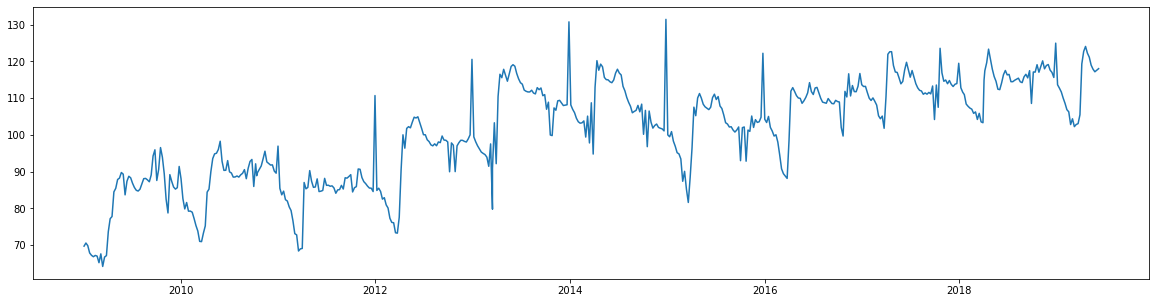

In [24]:
plt.figure(figsize=(20,5))
plt.plot(train_indexed)
plt.show()

Data is not Stationary

In [25]:
rolling_mean = train_indexed.rolling(window = 52).mean()
rolling_std = train_indexed.rolling(window = 52).mean()

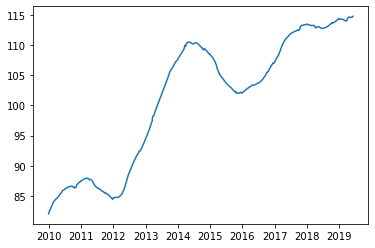

In [26]:
plt.plot(rolling_mean)

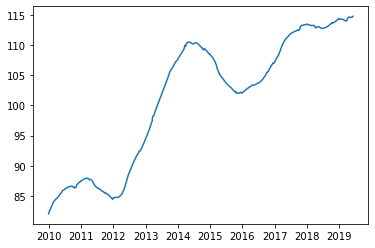

In [27]:
plt.plot(rolling_std)

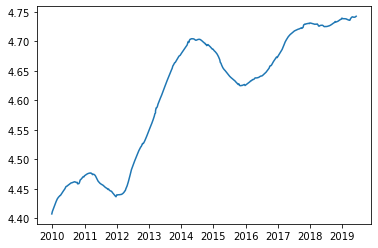

In [28]:
plt.plot(np.log(rolling_mean))